# item_cnt_day 값이 -(마이너스)인 관측치들 탐색

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import random
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
# 데이터 읽어오기

item_category_df = pd.read_csv("item_categories.csv")
item_df = pd.read_csv("items.csv")
shop_df = pd.read_csv("shops.csv")
sample_df = pd.read_csv("sample_submission.csv")
train_df = pd.read_csv("sales_train_v2.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_all = pd.merge(train_df, item_df, how='left', on=['item_id','item_id'])
train_all = pd.merge(train_all, item_category_df, how='left', on=['item_category_id','item_category_id'])
train_all = pd.merge(train_all, shop_df, how='left', on=['shop_id','shop_id'])

In [5]:
train_all['date'] = pd.to_datetime(train_all['date'], format='%d.%m.%Y')
train_all['day'] = train_all['date'].dt.day
train_all['month'] = train_all['date'].dt.month
train_all['year'] = train_all['date'].dt.year

In [6]:
# item, item_category, shop의 name 컬럼 제거
# id 컬럼으로 대체 가능하다 판다, 러시아어 번역필요 없음
train_all = train_all.drop(['item_name', 'item_category_name', 'shop_name'], axis = 1)

In [103]:
train_all.groupby('item_cnt_day').count()

,date,date_block_num,shop_id,item_id,item_price,item_category_id,day,month,year
item_cnt_day,,,,,,,,,
-22.0,1,1,1,1,1,1,1,1,1
-16.0,1,1,1,1,1,1,1,1,1
-9.0,1,1,1,1,1,1,1,1,1
-6.0,2,2,2,2,2,2,2,2,2
-5.0,4,4,4,4,4,4,4,4,4
-4.0,3,3,3,3,3,3,3,3,3
-3.0,14,14,14,14,14,14,14,14,14
-2.0,78,78,78,78,78,78,78,78,78
-1.0,7252,7252,7252,7252,7252,7252,7252,7252,7252


## 환불데이터만 가져오기

In [16]:
minus_1 = train_all['item_cnt_day'] == -1
minus_1 = train_all[minus_1==True]

In [7]:
minus_2 = train_all['item_cnt_day'] == -2
minus_2 = train_all[minus_2==True]

In [8]:
minus_3 = train_all['item_cnt_day'] == -3
minus_3 = train_all[minus_3==True]

In [9]:
minus_4 = train_all['item_cnt_day'] == -4
minus_4 = train_all[minus_4==True]

In [10]:
minus_5 = train_all['item_cnt_day'] == -5
minus_5 = train_all[minus_5==True]

In [11]:
minus_6 = train_all['item_cnt_day'] == -6
minus_6 = train_all[minus_6==True]

In [12]:
minus_9 = train_all['item_cnt_day'] == -9
minus_9 = train_all[minus_9==True]

In [13]:
minus_16 = train_all['item_cnt_day'] == -16
minus_16 = train_all[minus_16==True]

In [14]:
minus_22 = train_all['item_cnt_day'] == -22
minus_22 = train_all[minus_22==True]

In [17]:
item_cnt_minus = pd.concat([minus_1, minus_2, minus_3, minus_4, minus_5, minus_6, minus_9, minus_16, minus_22], axis=0)
item_cnt_minus

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
2,2013-01-05,0,25,2552,899.000000,-1.0,58,5,1,2013
148,2013-01-23,0,25,2321,999.000000,-1.0,28,23,1,2013
175,2013-01-07,0,25,2199,1449.000000,-1.0,58,7,1,2013
807,2013-01-02,0,25,2330,599.000000,-1.0,30,2,1,2013
1041,2013-01-13,0,25,5034,1989.000000,-1.0,23,13,1,2013
1193,2013-01-02,0,25,5651,5490.000000,-1.0,2,2,1,2013
1674,2013-01-07,0,25,4093,899.000000,-1.0,58,7,1,2013
1825,2013-01-02,0,25,4249,1894.870000,-1.0,23,2,1,2013
2411,2013-01-14,0,24,1628,3899.000000,-1.0,59,14,1,2013
3216,2013-01-08,0,24,20948,899.000000,-1.0,21,8,1,2013


In [19]:
# 특정한 날짜에 한가지 아이템의 가장 많은 환불 건수
item_cnt_minus.groupby(['date', 'item_id']).count().max()
# ==> 큰 의미없음

date_block_num      6
shop_id             6
item_price          6
item_cnt_day        6
item_category_id    6
day                 6
month               6
year                6
dtype: int64

### item_cnt_day == -1 

In [106]:
#환불데이터 중 가장 많은 관측치인 -1에 관한 데이터만 가져오기
minus1 = train_all['item_cnt_day'] == -1
minus1 = train_all[minus1==True]
minus1

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
2,2013-01-05,0,25,2552,899.00,-1.0,58,5,1,2013
148,2013-01-23,0,25,2321,999.00,-1.0,28,23,1,2013
175,2013-01-07,0,25,2199,1449.00,-1.0,58,7,1,2013
807,2013-01-02,0,25,2330,599.00,-1.0,30,2,1,2013
1041,2013-01-13,0,25,5034,1989.00,-1.0,23,13,1,2013
1193,2013-01-02,0,25,5651,5490.00,-1.0,2,2,1,2013
1674,2013-01-07,0,25,4093,899.00,-1.0,58,7,1,2013
1825,2013-01-02,0,25,4249,1894.87,-1.0,23,2,1,2013
2411,2013-01-14,0,24,1628,3899.00,-1.0,59,14,1,2013
3216,2013-01-08,0,24,20948,899.00,-1.0,21,8,1,2013


#### item_category_id

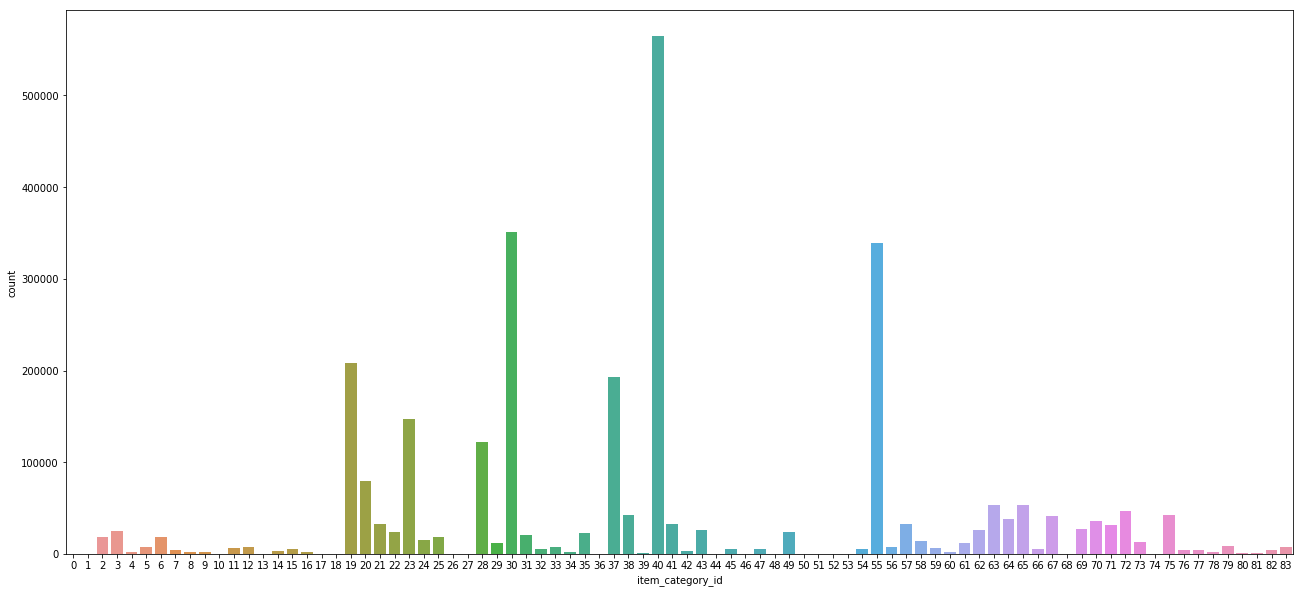

In [122]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(train_all.item_category_id)

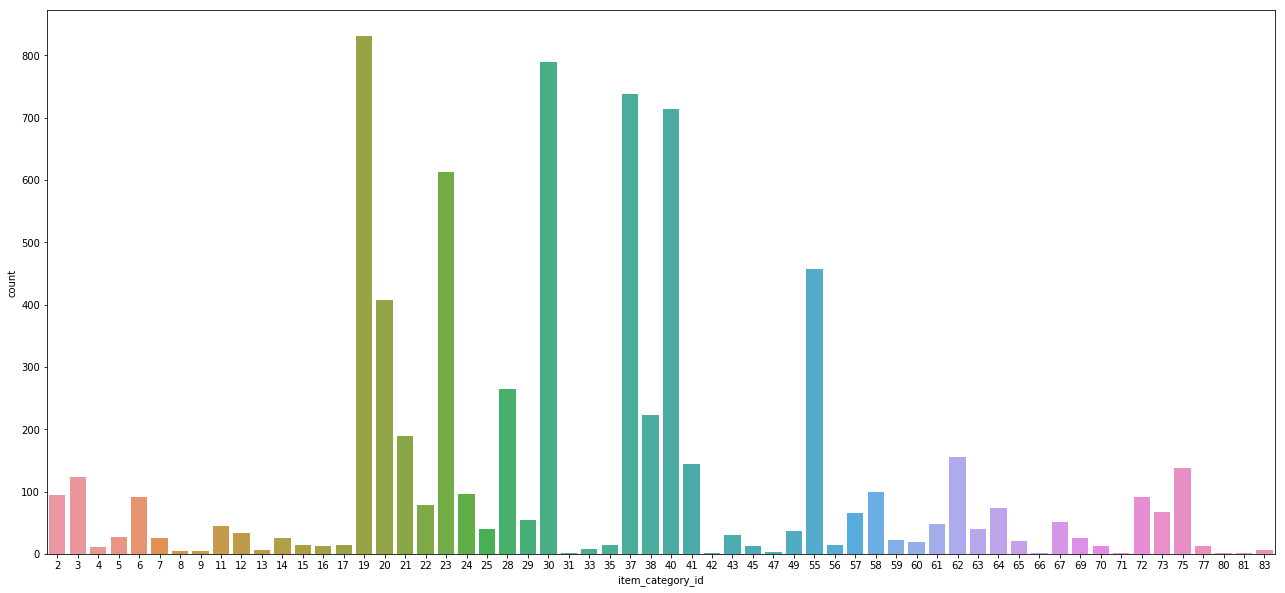

In [123]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(minus1.item_category_id)

==> 전체 데이터와 환불데이터 그래프를 비교하여 차이가 있어보이는 19와 37번 아이템 카테고리 데이터를 살펴보려 함

**item_category_id == 19**

In [141]:
# item_category_id == 19
category_19 = minus1['item_category_id'] == 19
category_19 = minus1[category_19==True]
category_19

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
7576,2013-01-03,0,19,19989,2499.00,-1.0,19,3,1,2013
7720,2013-01-15,0,19,19362,1998.50,-1.0,19,15,1,2013
9508,2013-01-02,0,19,3851,899.00,-1.0,19,2,1,2013
9693,2013-01-07,0,19,5031,1399.00,-1.0,19,7,1,2013
10229,2013-01-02,0,19,1953,899.00,-1.0,19,2,1,2013
15190,2013-01-02,0,28,6916,993.74,-1.0,19,2,1,2013
17183,2013-01-19,0,28,1801,1499.00,-1.0,19,19,1,2013
18549,2013-01-02,0,28,2340,894.26,-1.0,19,2,1,2013
25829,2013-01-09,0,26,4482,2499.00,-1.0,19,9,1,2013
30405,2013-01-03,0,4,7218,1589.00,-1.0,19,3,1,2013


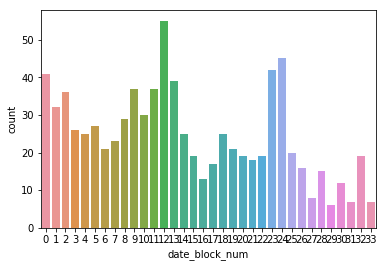

In [127]:
sns.countplot(category_19.date_block_num)

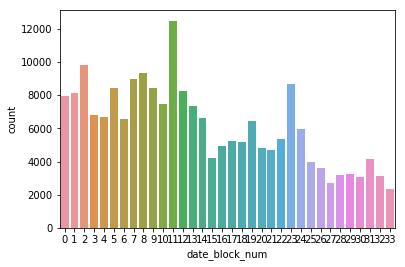

In [133]:
# 환불이 아닌 전체 매출조회에서 'item_category_id == 19' 비교하기
category_19_all = train_all['item_category_id'] == 19
category_19_all = train_all[category_19_all==True]
sns.countplot(category_19_all.date_block_num)

In [142]:
# 위의 두 그래프를 비교하여 date_block_num ==24인 관측치 추출
category_19_block_24 = category_19['date_block_num'] == 24
category_19_block_24 = category_19[category_19_block_24==True]
category_19_block_24
#==> 결론 : shop_id, item_id에 일관성이 없으므로 category가 환불에 특별한 요인이 되지 못함

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
2327655,2015-01-06,24,14,11389,899.00,-1.0,19,6,1,2015
2328001,2015-01-13,24,14,4872,899.00,-1.0,19,13,1,2015
2328878,2015-01-10,24,18,1564,2599.00,-1.0,19,10,1,2015
2329775,2015-01-19,24,19,4051,1999.00,-1.0,19,19,1,2015
2329886,2015-01-01,24,18,17709,899.00,-1.0,19,1,1,2015
2330161,2015-01-02,24,19,1485,1191.16,-1.0,19,2,1,2015
2331105,2015-01-04,24,16,5037,1999.00,-1.0,19,4,1,2015
2332591,2015-01-08,24,6,1485,1191.16,-1.0,19,8,1,2015
2333496,2015-01-08,24,6,7806,1407.84,-1.0,19,8,1,2015
2334233,2015-01-02,24,4,4051,1999.00,-1.0,19,2,1,2015


**item_category_id == 37**

In [129]:
# item_category_id == 37
category_37 = minus1['item_category_id'] == 37
category_37 = minus1[category_37==True]
category_37

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
4927,2013-01-20,0,25,16746,399.00,-1.0,37,20,1,2013
5505,2013-01-14,0,25,16451,499.00,-1.0,37,14,1,2013
7277,2013-01-26,0,25,9696,549.00,-1.0,37,26,1,2013
13634,2013-01-16,0,22,14549,149.00,-1.0,37,16,1,2013
13895,2013-01-16,0,22,17362,149.00,-1.0,37,16,1,2013
14076,2013-01-16,0,22,16713,199.00,-1.0,37,16,1,2013
27393,2013-01-23,0,27,16451,499.00,-1.0,37,23,1,2013
27487,2013-01-15,0,27,18589,999.00,-1.0,37,15,1,2013
28116,2013-01-23,0,27,14911,299.00,-1.0,37,23,1,2013
49146,2013-01-04,0,18,9165,499.00,-1.0,37,4,1,2013


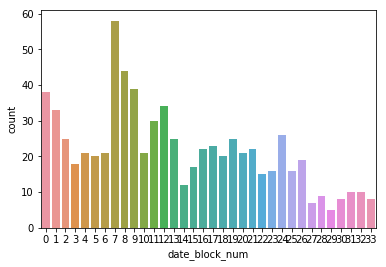

In [130]:
sns.countplot(category_37.date_block_num)

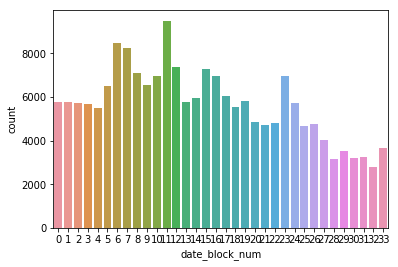

In [134]:
# 환불이 아닌 전체 매출조회에서 'item_category_id == 37' 비교하기
category_37_all = train_all['item_category_id'] == 37
category_37_all = train_all[category_37_all==True]
sns.countplot(category_37_all.date_block_num)

==> 결론 : category가 환불에 특별한 영향을 주지 않음

#### shop_id

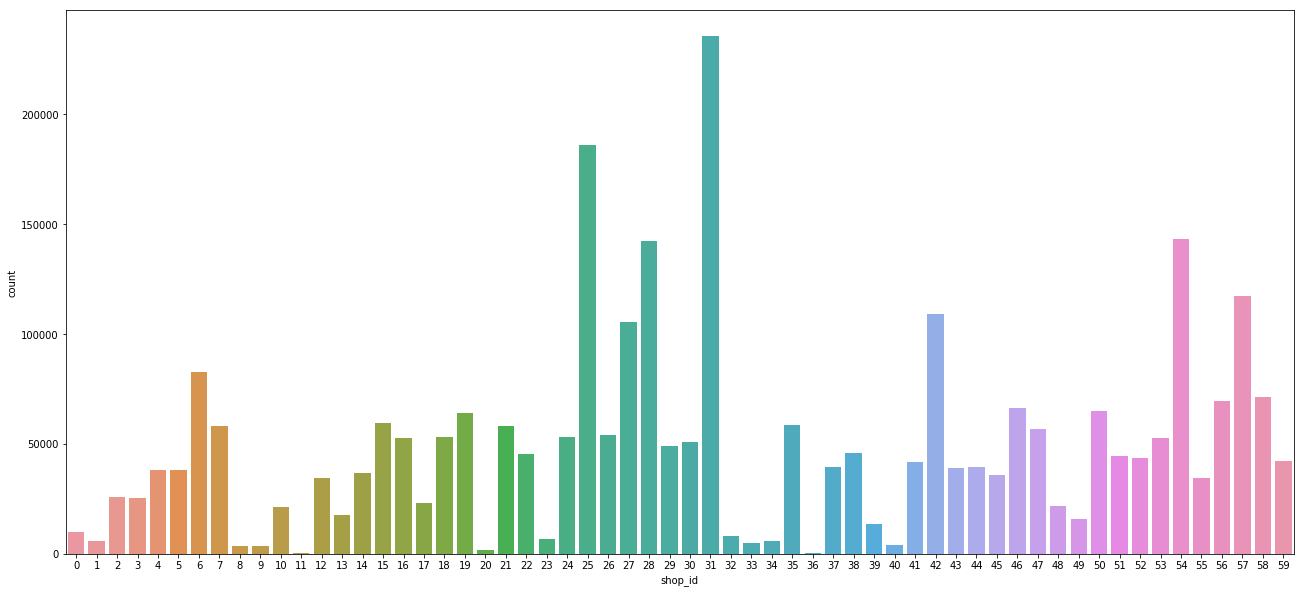

In [119]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(train_all.shop_id)

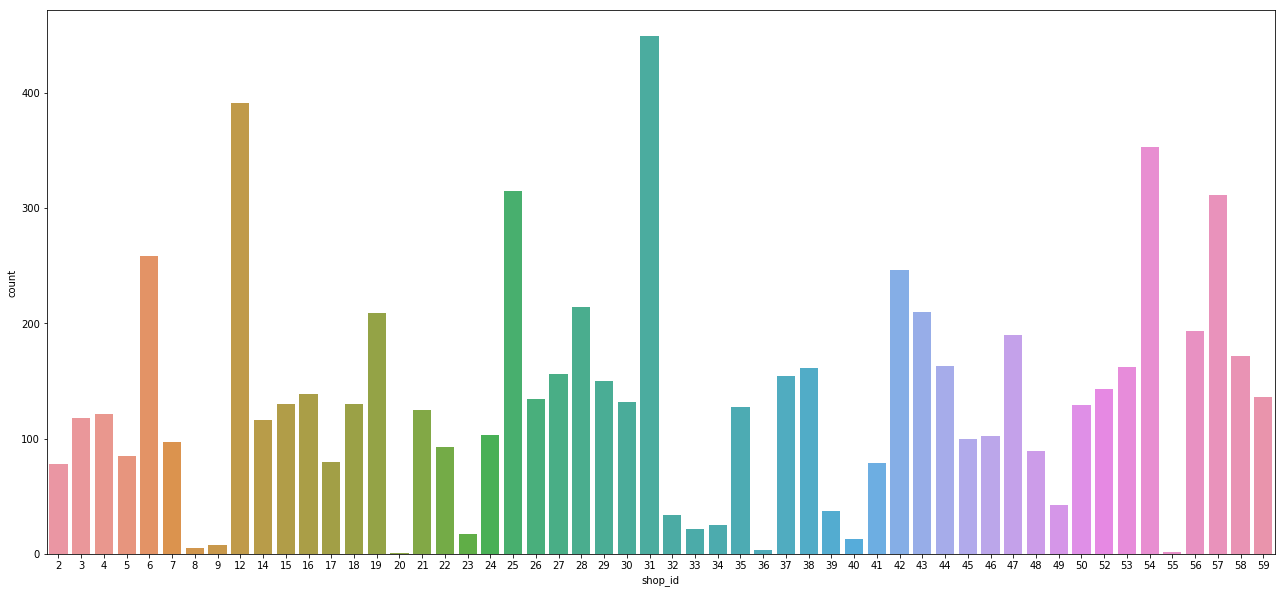

In [120]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(minus1.shop_id)

==> 전체 데이터와 환불데이터 그래프를 비교하여 차이가 있어보이는 12번 매장 데이터를 살펴보려 함

In [135]:
shop_12 = minus1['shop_id'] == 12
shop_12 = minus1[shop_12==True]
shop_12

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
58263,2013-01-15,0,12,9999,149.0,-1.0,40,15,1,2013
58292,2013-01-15,0,12,8555,240.0,-1.0,49,15,1,2013
58311,2013-01-15,0,12,9483,149.0,-1.0,40,15,1,2013
58330,2013-01-15,0,12,11777,549.0,-1.0,41,15,1,2013
58378,2013-01-15,0,12,8200,149.0,-1.0,40,15,1,2013
58400,2013-01-14,0,12,6495,699.0,-1.0,28,14,1,2013
58420,2013-01-10,0,12,5274,1999.0,-1.0,23,10,1,2013
58535,2013-01-15,0,12,19360,999.0,-1.0,62,15,1,2013
58588,2013-01-29,0,12,20384,1599.0,-1.0,72,29,1,2013
58663,2013-01-15,0,12,13511,1599.0,-1.0,19,15,1,2013


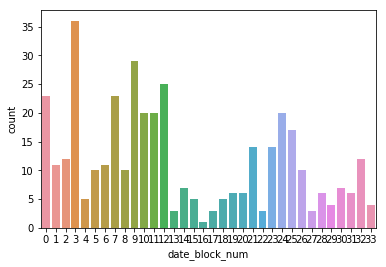

In [136]:
sns.countplot(shop_12.date_block_num)

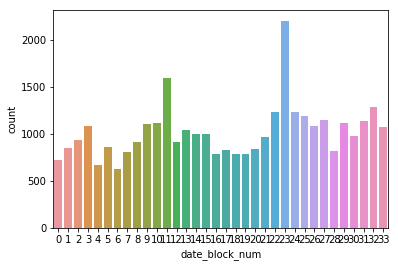

In [137]:
# 환불이 아닌 전체 매출조회에서 'shop_id == 12' 비교하기
shop_12_all = train_all['shop_id'] == 12
shop_12_all = train_all[shop_12_all==True]
sns.countplot(shop_12_all.date_block_num)

In [144]:
# 위의 두 그래프를 비교하여 date_block_num ==0인 관측치 추출
shop_12_block_0 = shop_12['date_block_num'] == 0
shop_12_block_0 = shop_12[shop_12_block_0==True]
shop_12_block_0

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
58263,2013-01-15,0,12,9999,149.0,-1.0,40,15,1,2013
58292,2013-01-15,0,12,8555,240.0,-1.0,49,15,1,2013
58311,2013-01-15,0,12,9483,149.0,-1.0,40,15,1,2013
58330,2013-01-15,0,12,11777,549.0,-1.0,41,15,1,2013
58378,2013-01-15,0,12,8200,149.0,-1.0,40,15,1,2013
58400,2013-01-14,0,12,6495,699.0,-1.0,28,14,1,2013
58420,2013-01-10,0,12,5274,1999.0,-1.0,23,10,1,2013
58535,2013-01-15,0,12,19360,999.0,-1.0,62,15,1,2013
58588,2013-01-29,0,12,20384,1599.0,-1.0,72,29,1,2013
58663,2013-01-15,0,12,13511,1599.0,-1.0,19,15,1,2013


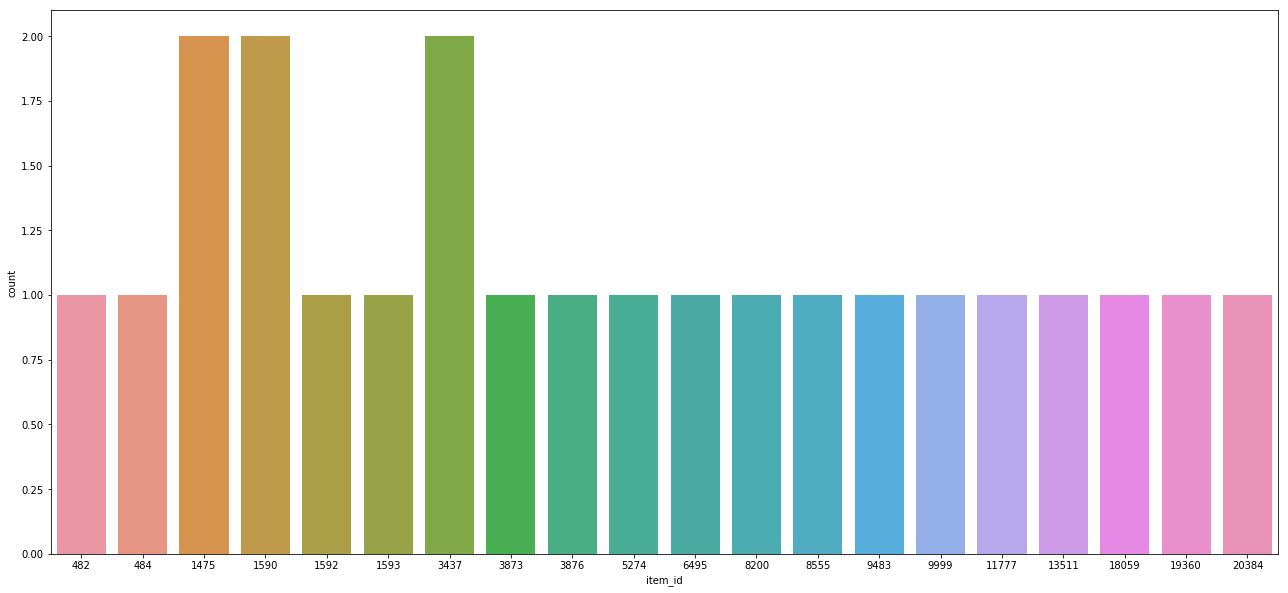

In [147]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(shop_12_block_0.item_id)
# 의미 없음

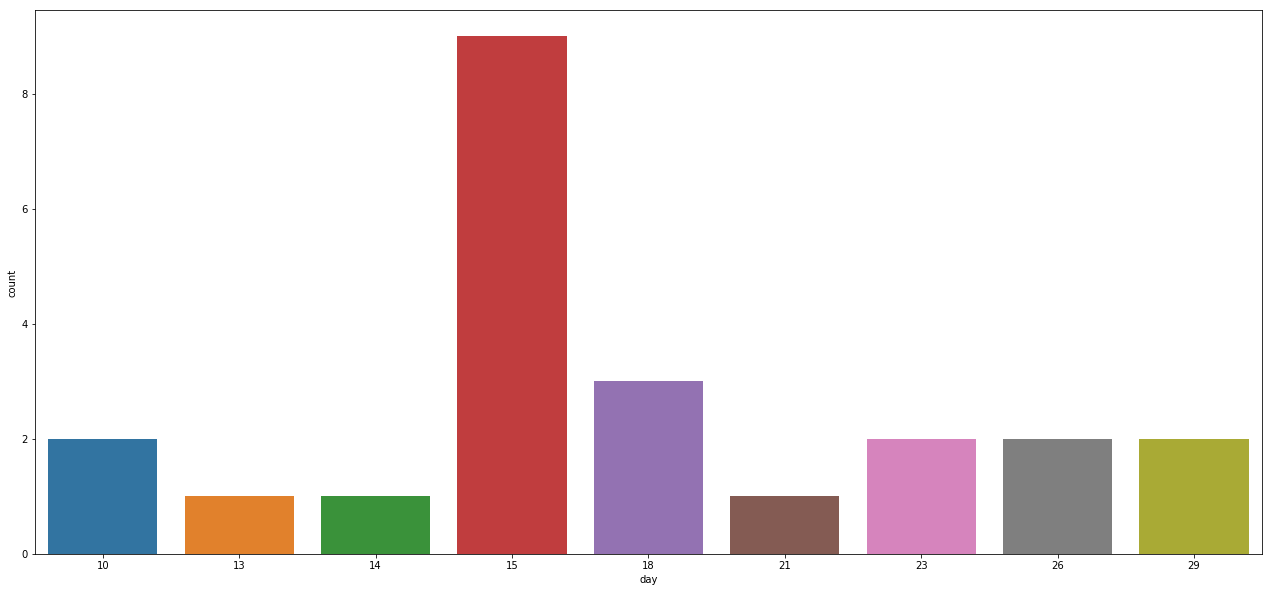

In [150]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(shop_12_block_0.day)

In [145]:
# 위의 두 그래프를 비교하여 date_block_num ==3인 관측치 추출
shop_12_block_3 = shop_12['date_block_num'] == 3
shop_12_block_3 = shop_12[shop_12_block_3==True]
shop_12_block_3

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
366629,2013-04-25,3,12,793,3300.0,-1.0,73,25,4,2013
366768,2013-04-10,3,12,482,3300.0,-1.0,73,10,4,2013
366778,2013-04-04,3,12,484,300.0,-1.0,73,4,4,2013
366786,2013-04-16,3,12,1525,649.0,-1.0,30,16,4,2013
366837,2013-04-03,3,12,3697,2699.0,-1.0,19,3,4,2013
366841,2013-04-26,3,12,3697,2699.0,-1.0,19,26,4,2013
366888,2013-04-16,3,12,1531,499.0,-1.0,28,16,4,2013
366900,2013-04-16,3,12,1920,249.0,-1.0,30,16,4,2013
366921,2013-04-29,3,12,2705,899.0,-1.0,23,29,4,2013
369849,2013-04-29,3,12,12231,350.0,-1.0,49,29,4,2013


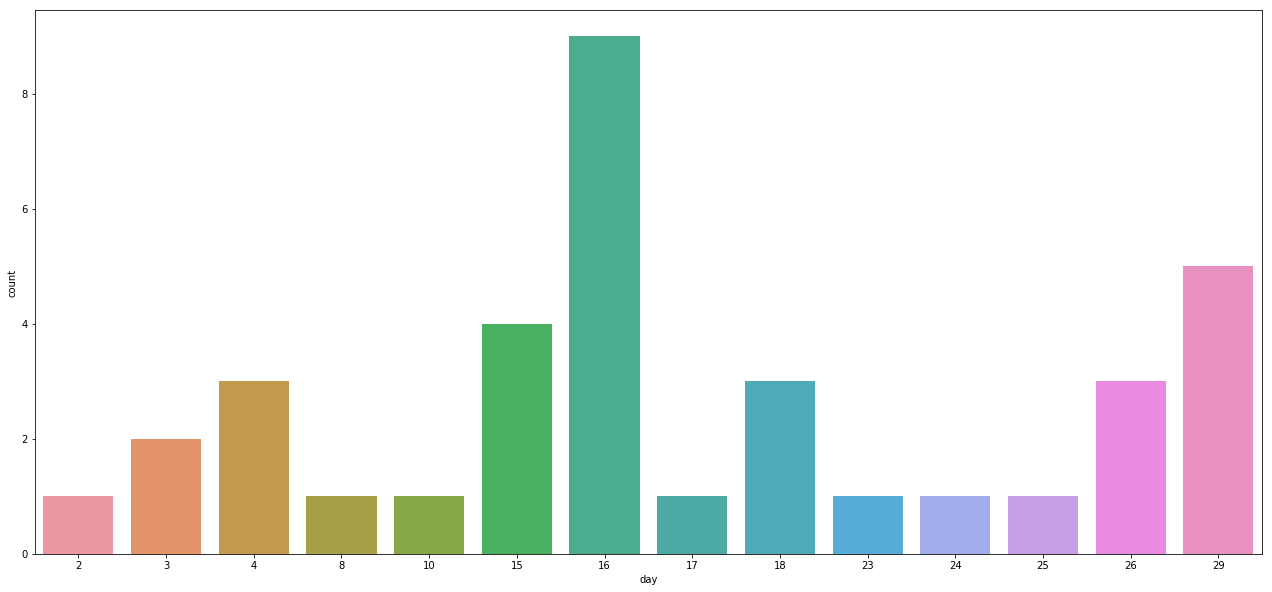

In [151]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(shop_12_block_3.day)

In [149]:
# 위의 두 그래프를 비교하여 date_block_num ==7인 관측치 추출
shop_12_block_7 = shop_12['date_block_num'] == 7
shop_12_block_7 = shop_12[shop_12_block_7==True]
shop_12_block_7

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
836209,2013-08-08,7,12,3738,299.0,-1.0,19,8,8,2013
836252,2013-08-08,7,12,4265,99.0,-1.0,30,8,8,2013
836271,2013-08-08,7,12,2753,599.0,-1.0,30,8,8,2013
836273,2013-08-08,7,12,2746,299.0,-1.0,30,8,8,2013
836275,2013-08-08,7,12,2703,599.0,-1.0,30,8,8,2013
836409,2013-08-08,7,12,5406,349.0,-1.0,30,8,8,2013
836410,2013-08-08,7,12,5822,1049.0,-1.0,35,8,8,2013
836460,2013-08-08,7,12,1942,3299.0,-1.0,19,8,8,2013
836635,2013-08-08,7,12,1590,2599.0,-1.0,29,8,8,2013
836647,2013-08-06,7,12,1517,199.0,-1.0,30,6,8,2013


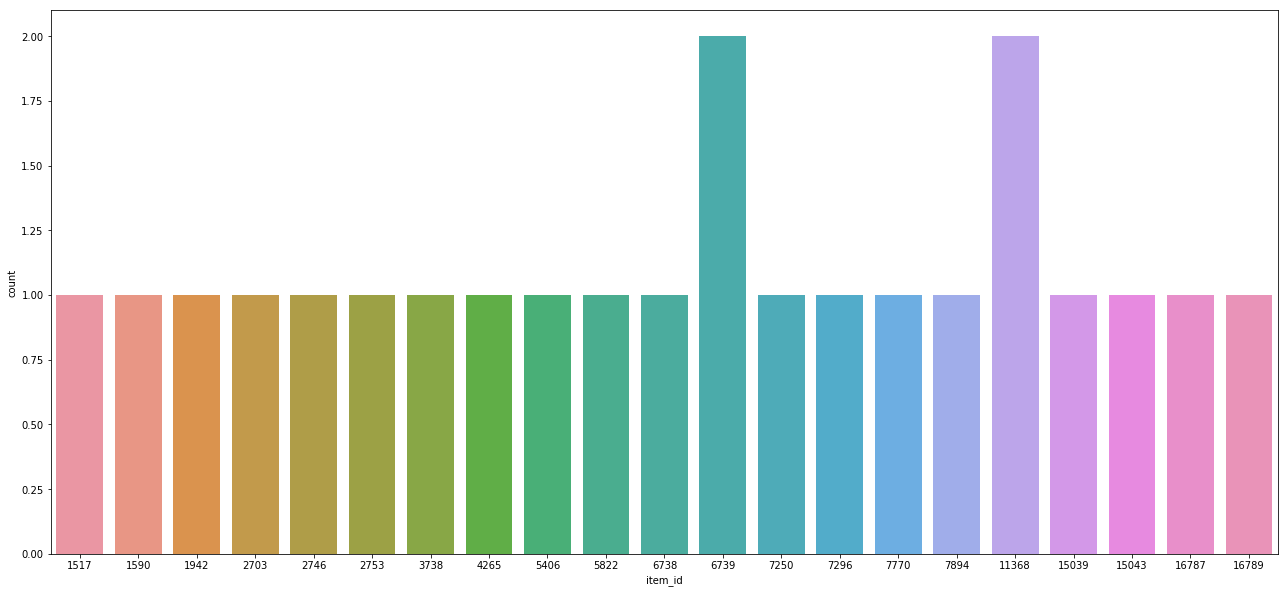

In [152]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(shop_12_block_7.item_id)
# 의미없음

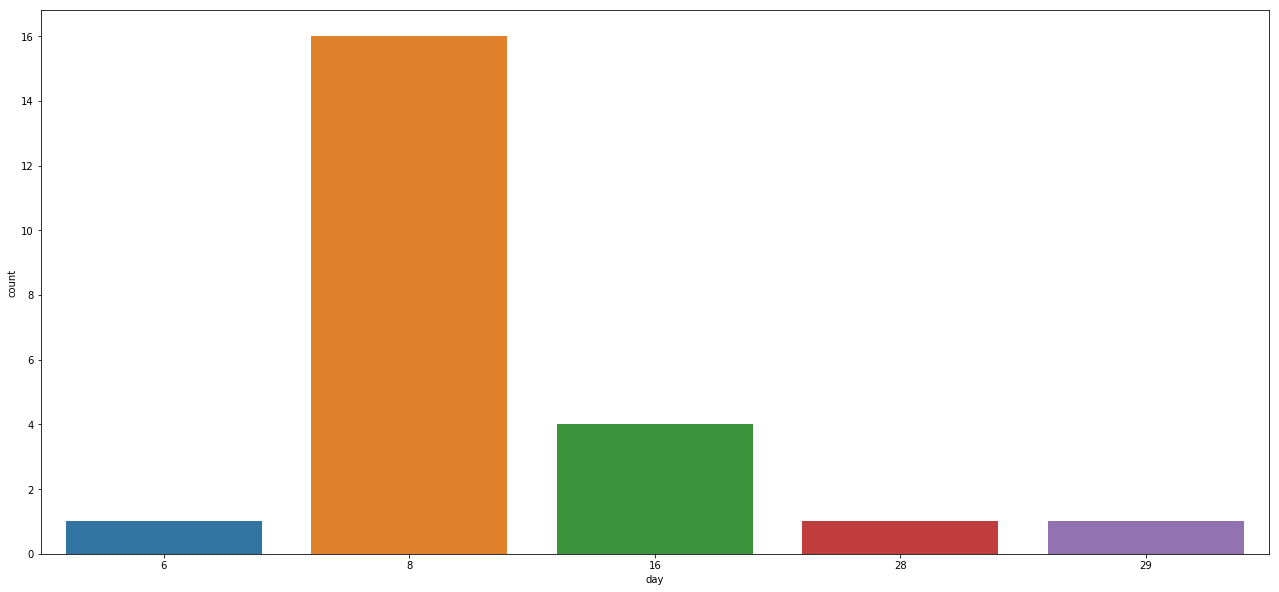

In [153]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(shop_12_block_7.day)

In [154]:
# 위의 두 그래프를 비교하여 date_block_num ==23인 관측치 추출
shop_12_block_23 = shop_12['date_block_num'] == 23
shop_12_block_23 = shop_12[shop_12_block_23==True]
shop_12_block_23

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
2258127,2014-12-05,23,12,13560,2399.0,-1.0,61,5,12,2014
2258184,2014-12-04,23,12,9345,349.0,-1.0,70,4,12,2014
2258611,2014-12-04,23,12,19493,1549.0,-1.0,61,4,12,2014
2258712,2014-12-05,23,12,14663,199.0,-1.0,55,5,12,2014
2263212,2014-12-05,23,12,1569,2999.0,-1.0,19,5,12,2014
2263217,2014-12-03,23,12,1565,2599.0,-1.0,23,3,12,2014
2263298,2014-12-05,23,12,1556,2999.0,-1.0,20,5,12,2014
2263439,2014-12-05,23,12,2783,9999.0,-1.0,20,5,12,2014
2263647,2014-12-05,23,12,806,249.0,-1.0,49,5,12,2014
2263651,2014-12-04,23,12,485,300.0,-1.0,73,4,12,2014


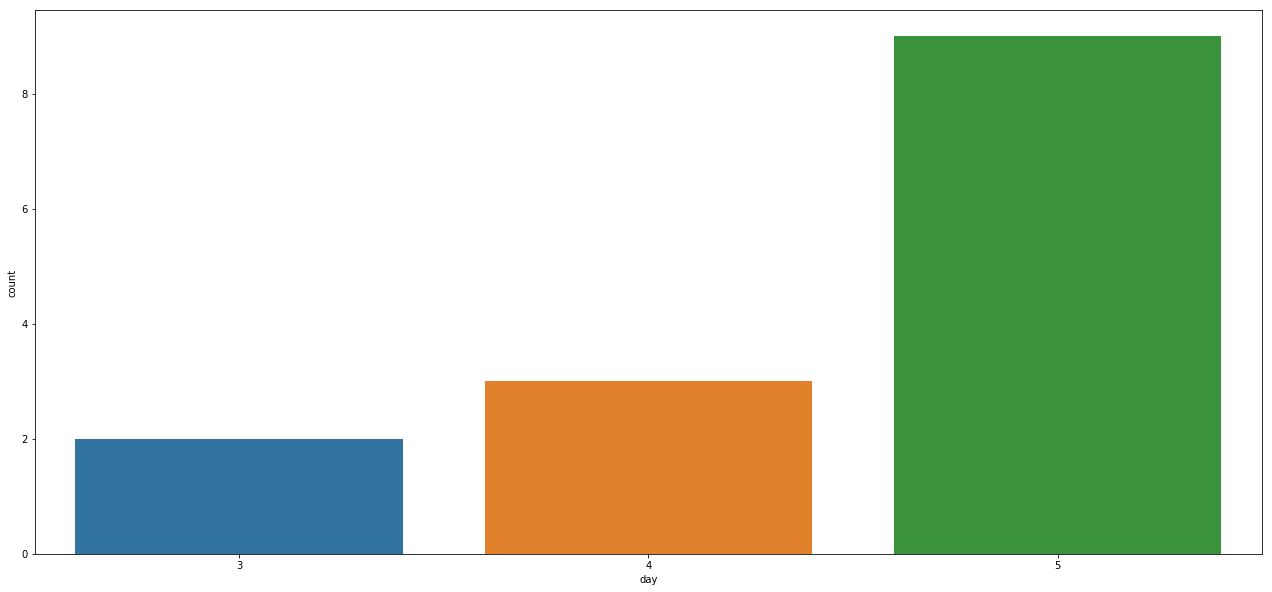

In [156]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(shop_12_block_23.day)

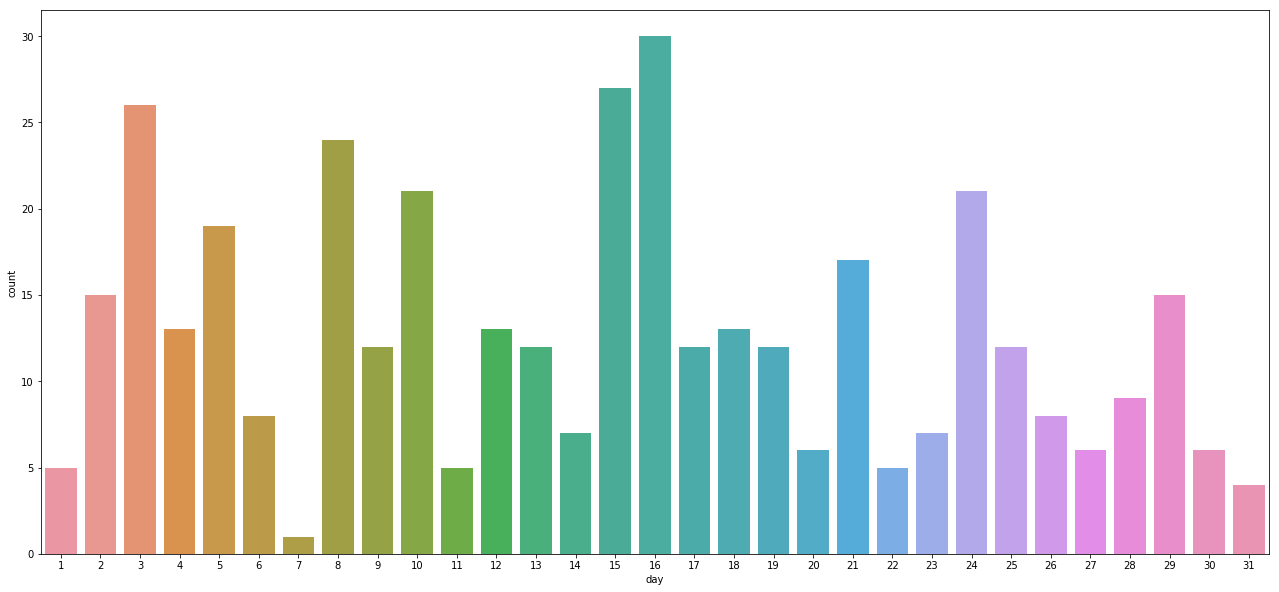

In [161]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(shop_12.day)

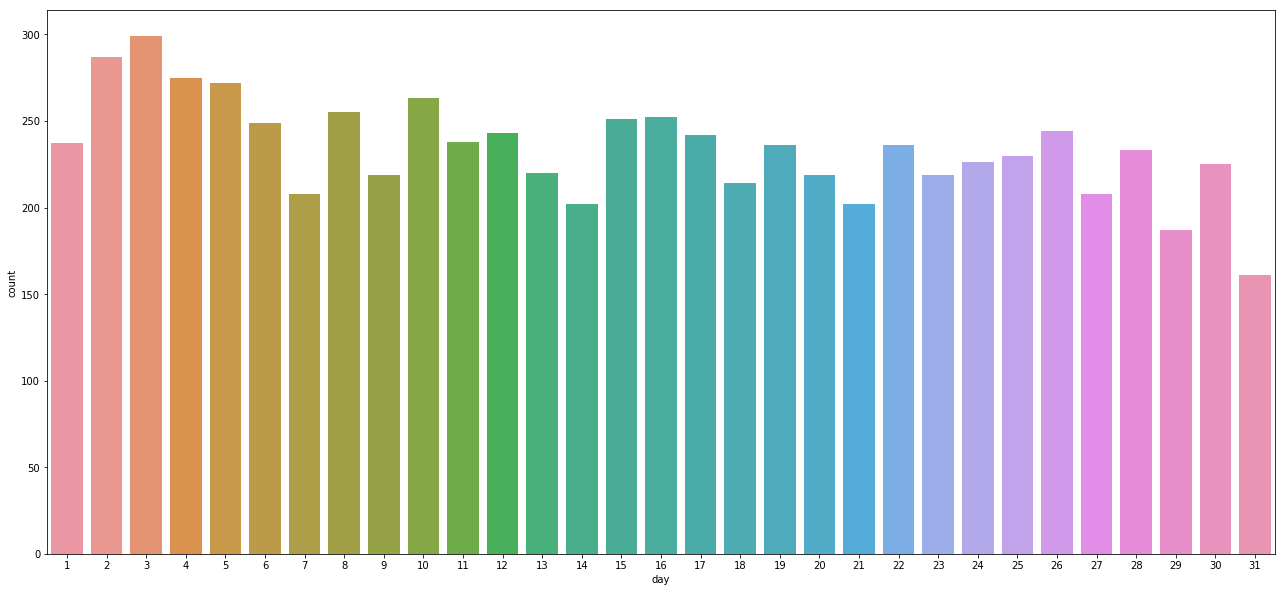

In [158]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(minus1.day)

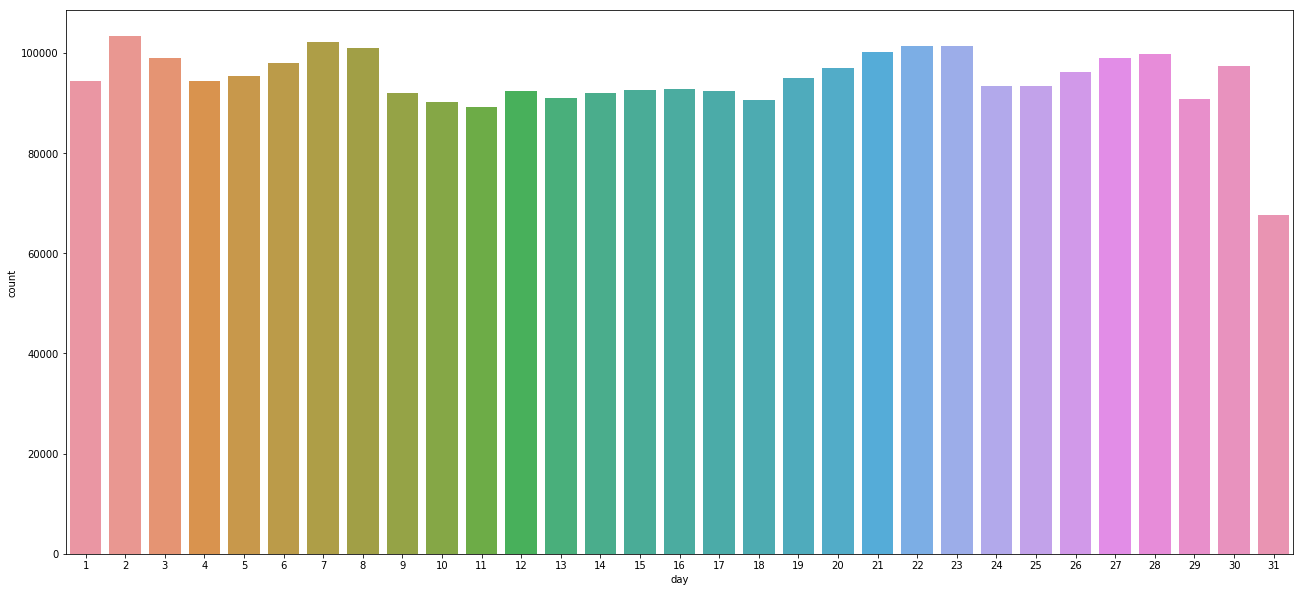

In [162]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(train_all.day)

#### date_block_num

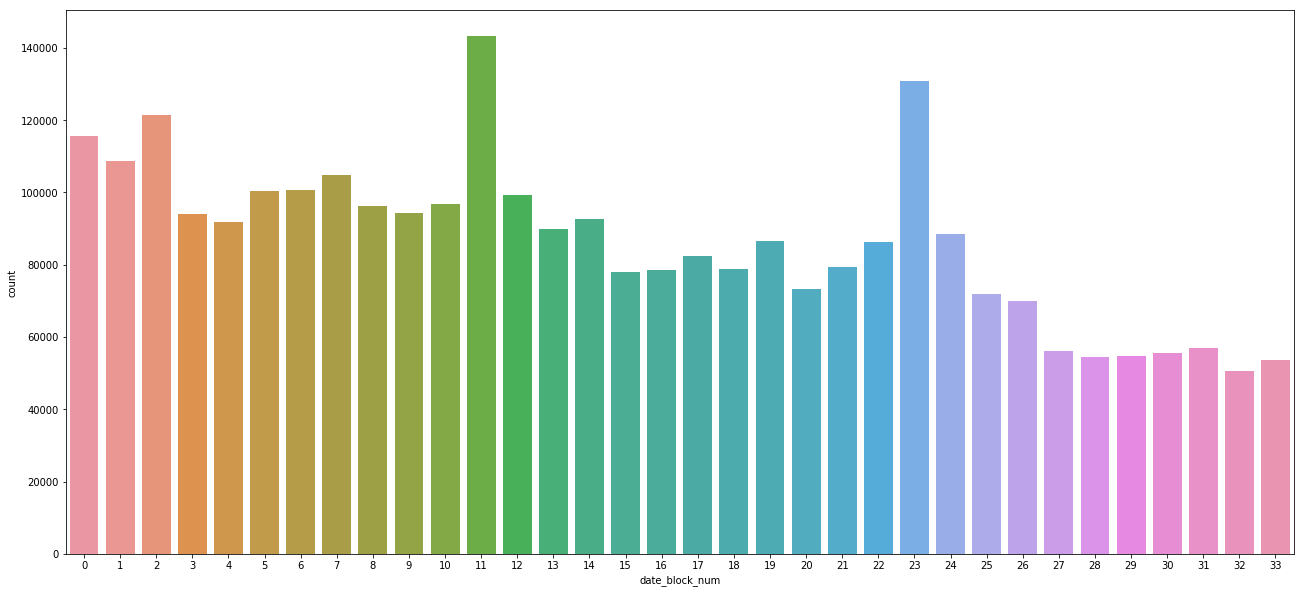

In [124]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(train_all.date_block_num)

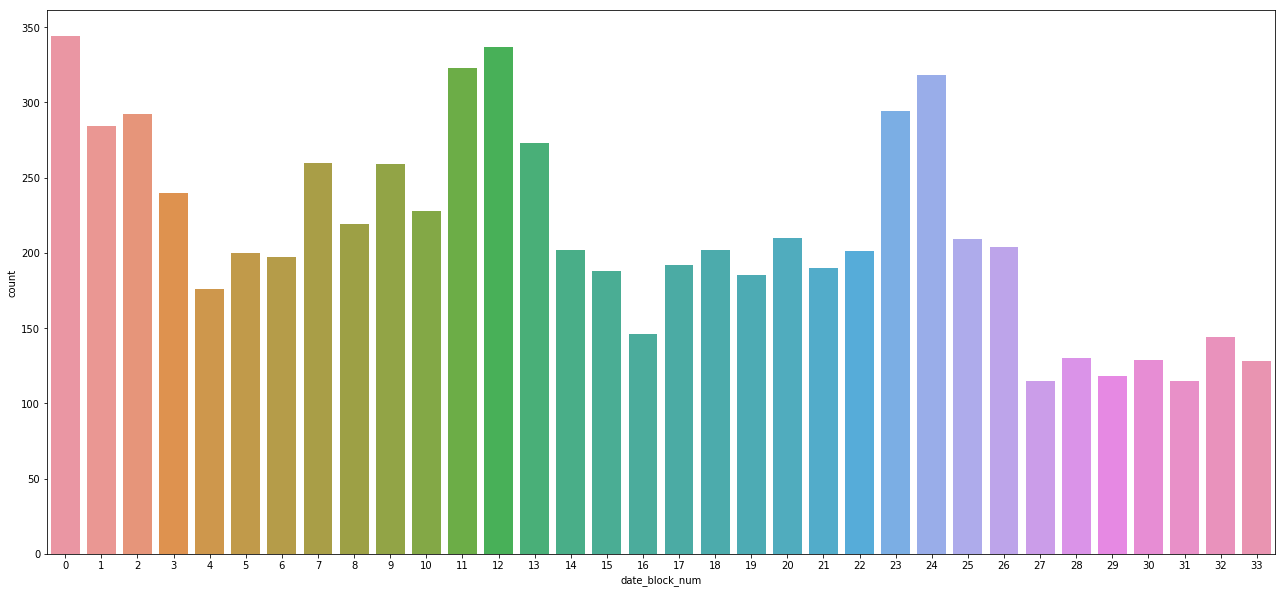

In [125]:
fig, axes = plt.subplots(1, 1, figsize=(22, 10), sharex=True)
sns.countplot(minus1.date_block_num)